<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 2</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |  **100**
|--------------------------|--------
|  **Weight**              |  **20% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Friday, May 24**
|  **Submission mode**     |  **Electronic, Using GitLab <br/> One submission per group**
|  **Estimated time**      |  **20 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-2.ipynb` and any other additional files that you may have created / hyperlinked in this notebook, as part of your submission by pushing it to your forked GitLab repository. You need to add your group details below. Make sure your group works on and submits only one fork of the assignment repository. 


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* With respect to any code that you submit, you will be marked on the **correctness** and **readability** of your code. If your marker can't understand your code, your marks may be deducted.

<span style="color:blue">
    
### Group Number :  097

### Student IDs: u6250866(Yu Wu), u6683369(Jinming Dong)

</span>

## Introduction



In [13]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [14]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.preprocessing import scale

***

## Section A - Database Management (15 Marks)

You have been given the following database containing 15 tables relating to **DVD Movie Rentals**. The data contained in these tables is as follows -

|  **Table**               |  **Data Description**      |
|--------------------------|----------------------------|
|  actor                   |  actors data including first name and last name     |
|  film                    |  films data such as title, release year, length, rating, etc      |
|  film_actor              |  stores the relationships between films and actors |
|  category                |  stores film’s categories data |
|  film_category           |  stores the relationships between films and categories | 
|  store                   |  store data including manager staff and address |
|  inventory               |  stores inventory data |
|  rental                  |  stores rental data |
|  payment                 |  stores customer's payments |
|  staff                   |  stores staff data |
|  customer                |  stores customer data |
|  address                 |  address data for staff and customers |
|  city                    |  stores city data |
|  country                 |  stores country data |

Visualizing the relations between these tables can be aided by looking at the below **E-R Diagram**.

<img src='./dvd_rental_er.png'>

Based on your understanding of the relationships between these tables, answer the following questions by writing SQL queries to get the required data rows from the database and display them as a **Pandas dataframe**. 

***
#### **NOTE**:
For the following questions, in the CSIT labs you will be able to connect directly to the database using the below code within the notebook. From outside of the CSIT labs, you will need to perform SQL queries in your terminal by using [partch](https://cs.anu.edu.au/docs/student-computing-environment/linuxlabs/remoteaccess/#connectingtopartch3). Once you have the correct query, you may just fill in the boxes below.

**Partch Instructions**
1. Connect to partch as per the above hyperlink
2. In your terminal, enter `psql` to access the sql database
3. Enter `\c dvdrental` to ensure you are accessing the assignment database (or simply specify dvdrental when connecting to the database server -- `psql dvdrental`).
4. (Sanity Check) Enter `SELECT * FROM actor;` . If you receive the first row to be "Penelope Guiness", you should be good to go !
***

In [15]:
# Connect using psycopg2
conn = psycopg2.connect(host="/var/run/postgresql", database="dvdrental")

# Activate connection cursor
curr = conn.cursor()

In [16]:
def execute_sql(query):
    # Select table and display
    curr.execute(query)

    # Fetches all the rows from the result of the query
    rows = curr.fetchall()
    
    # Gets the column names for the table
    colnames = [desc[0] for desc in curr.description]

    # Converts into readable pandas dataframe
    df_result = pd.DataFrame(rows, columns=colnames)
    return df_result

### 1. Write an SQL query to determine the total sales from the rentals of the film 'Affair Prejudice' from the rental store with `store_id = 2`. Your query should result in a single column called `Total Rental Cost` with the value of the total cost of all these rentals.
<span style= 'float: right;'><b>[3 marks]</b></span>

In [17]:
# YOUR QUERY HERE

query = "select sum(pe.amount) as Total_Rental_Cost from (select customer_id , rental_id from (select h.inventory_id from (select film_id from film where Film.title =  'Affair Prejudice')as w,(select inventory_id, film_id from Inventory where store_id = 2) as h where w.film_id = h.film_id) as o,Rental as p where o.inventory_id=p.inventory_id) as new, Payment as pe where (new.customer_id=pe.customer_id) AND (new.rental_id=pe.rental_id);"

execute_sql(query)

,total_rental_cost
0,33.91


### 2. Write an SQL query to retrieve the names of all customers who rented the film ‘Affair Prejudice’ from the store with `store_id = 1`. The result of your query should display each customer's first name and last name. 
<span style= 'float: right;'><b>[3 marks]</b></span>

In [18]:
# YOUR QUERY HERE

query = "select distinct c.first_name, c.last_name from (select b.film_id,a.first_name, a.last_name from (select customer_id, film_id from Inventory, Rental where Inventory.inventory_id = Rental.inventory_id) as b, (select customer_id, first_name, last_name from Customer where store_id = 1) as a where b.customer_id = a.customer_id) as c,(select film_id from Film where Film.title =  'Affair Prejudice')as d where d.film_id = c.film_id;"

execute_sql(query)

,first_name,last_name
0,Carmen,Owens
1,Deanna,Byrd
2,Eleanor,Hunt
3,Jerome,Kenyon
4,Jimmy,Schrader
5,Jordan,Archuleta
6,Michael,Silverman
7,Natalie,Meyer
8,Nina,Soto
9,Ruben,Geary


### 3. Write an SQL query to retrieve the names of all those customers who have a total of more than 100 dollars in recorded payments. Your query's result should include each customer's first name, last name and customer ID. 
<span style= 'float: right;'><b>[4 marks]</b></span>

In [19]:
# YOUR QUERY HERE

query = "select f.first_name, f.last_name, e.customer_id from (select customer_id, sum(amount) as total_payment from Payment p group by p.customer_id) as e,(select * from Customer) as f where e.customer_id = f.customer_id and e.total_payment > 100 order by e.customer_id;"

execute_sql(query)

,first_name,last_name,customer_id
0,Mary,Smith,1
1,Patricia,Johnson,2
2,Linda,Williams,3
3,Elizabeth,Brown,5
4,Maria,Miller,7
5,Karen,Jackson,13
6,Helen,Harris,15
7,Sandra,Martin,16
8,Sharon,Robinson,20
9,Michelle,Clark,21


### 4. Write an SQL query to retrieve the names of all customers who have rented the movie ‘Angels Life’ from *both* stores with `store_id = 1` and `store_id = 2`. Your query's result should include each customer's first name, last name and customer ID.
<span style= 'float: right;'><b>[5 marks]</b></span>

In [20]:
# YOUR QUERY HERE

query = "select customer.first_name, customer.last_name, customer.customer_id from customer, (select count(rental.customer_id) as c,rental.customer_id from rental, (select rental_id,inventory.inventory_id,film_id,store_id from rental,inventory where inventory.inventory_id = rental.inventory_id) as w, (select film_id from film where film.title = 'Angels Life') as h where rental.rental_id = w.rental_id and rental.inventory_id = w.inventory_id and w.film_id = h.film_id group by rental.customer_id) as f where f.c = 2 and customer.customer_id = f.customer_id;"

execute_sql(query)

,first_name,last_name,customer_id
0,Cathy,Spencer,163


***

## Section B - Data Acquisition (20 Marks)

In this section, you need to read and import the data from the database into Python and make it ready to be used by your machine learning algorithms in the next section. **Your task here is to load the required columns from the various appropriate tables in the database to fuel the data required to train your machine learning models in the next section.** You can load the required data into one or more Pandas dataframes, to suit the the needs of different Machine Learning models in Section C. 

If you fail to do so, or an error in the previous section is preventing you from doing so, we can provide you with a **CSV of the required data**. If you choose to use this CSV, you will not receive any marks for this section, but you'll be able to do the following section without having to spend time on this section.  

<span style='color:red;'><b>Note:</b> While you are provided the .csv files to use for development of the later questions at home, you must submit a copy of the code that can read the database to receive marks for this section.</span>
<span style= 'float: right;'><b>[20 marks]</b></span>

In [21]:
# YOUR CODE HERE
homework_language = pd.read_csv("data/dvd_rental/language.csv")
homework_film1 = pd.read_csv("data/dvd_rental/film.csv")
lba = LabelEncoder()
rating = homework_film1['rating']
lba.fit(rating)
homework_film1['rating'] = lba.transform(homework_film1['rating'])

homework_payment1 = pd.read_csv("data/dvd_rental/payment.csv")
lbc = LabelEncoder()
amount = homework_payment1['amount']
lbc.fit(amount)
homework_payment1['amount'] = lbc.transform(homework_payment1['amount'])

homework_actor = pd.read_csv("data/dvd_rental/film_actor.csv")
homework_category = pd.read_csv("data/dvd_rental/category.csv")
homework_filmCategory = pd.read_csv("data/dvd_rental/film_category.csv")
homework_customer = pd.read_csv("data/dvd_rental/customer.csv")
homework_inventory = pd.read_csv("data/dvd_rental/inventory.csv")
homework_rental = pd.read_csv("data/dvd_rental/rental.csv")
homework_address = pd.read_csv("data/dvd_rental/address.csv")
homework_film = pd.read_csv("data/dvd_rental/film.csv")


***

## Section C - Machine Learning (55 Marks)
<span style='color:purple;'><b>Note:</b> We have provided the .csv outputs for the files to use in these questions if you are working on the assignment at home. Please note if any of these questions refer to those csvs and not the data from Section B in your submitted assignment, you will receive no marks for Section B.</span>

In [22]:
## Import csv files for home development here as necessary. 
homework_rental = pd.read_csv("data/dvd_rental/rental.csv")
homework_inventory = pd.read_csv("data/dvd_rental/inventory.csv")
homework_category = pd.read_csv("data/dvd_rental/film_category.csv")
film1 = pd.read_csv("data/dvd_rental/film.csv")
lba = LabelEncoder()
rating = homework_film1['rating']
lba.fit(rating)
film1['rating'] = lba.transform(homework_film1['rating'])

# read in other csvs as necessary.
one =  film1[['film_id','rating','length','rental_rate']]
two =  homework_inventory[['inventory_id','film_id']]
three = homework_rental[['rental_id','inventory_id','customer_id']]

part = one.join(homework_category.set_index('film_id'), on = 'film_id',how = 'inner')[['film_id','length','category_id','rating','rental_rate']]
part1 =part.join(two.set_index('film_id'), on = 'film_id',how = 'inner')[['inventory_id','length','film_id','category_id','rating','rental_rate']]
part2 = part1.join(three.set_index('inventory_id'), on = 'inventory_id',how = 'inner')[['customer_id','length','category_id','rating','rental_rate']]

p = pd.DataFrame(part2.groupby(['customer_id']).length.mean())
p1 = pd.DataFrame(part2.groupby(['customer_id']).rental_rate.mean())
p2 = pd.DataFrame(part2.groupby(['customer_id']).rating.agg(lambda x:x.value_counts().index[0]))
p3 = pd.DataFrame(part2.groupby(['customer_id']).category_id.agg(lambda x:x.value_counts().index[0]))

p4 = pd.DataFrame()
p4['customer_id'] = homework_customer.customer_id.sort_values()
p4['length'] = p.length
p4['rental_rate'] = p1.rental_rate
p4['rating'] = p2.rating
p4['category_id'] = p3.category_id
p4 = p4.set_index('customer_id')
p4.fillna(0, inplace=True)
final_part = scale(p4)

### Part 1 - Clustering (25 Marks)

### Part 1.1 - Clustering Short Answers (8 Marks)

#### 1. Can a Decision Tree be used to perform clustering? If so, explain how. If not, provide a counterexample showing how it is not suitable for the function.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
A decision tree algorithm can be used to perform clustering. However, for the technique to work many important issues have to be addressed. The key issue is that the purity function used in decision tree building is not sufficient for clustering. Also clustering generated by this technique often generates natural clusters and is not dependent on any objective function.

**

#### 2. Will a K-means Clustering Algorithm generate the same results each time? Provide examples on how this may or may not be the case.
<span style= 'float: right;'><b>[4 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>
No.This is the initialization problem for kmeans, as when kmeans starts it picks up the random initial points to cluster your data. Then python selects k number of random points and calculates the distance of points in your data to these locations and finds new centroids to further minimize the distance. so because of these random initial points you get different results for centroid locations, but the answer is similar.

**

### Part 1.2 - K-Means Clustering Implementation (17 Marks)

Clustering helps visualise a dataset based on attributes considered important to the data scientist and/or reader.  From the dataset acquired after completing **Section - B**, implement a `K-Means clustering algorithm` to help you cluster the dataset of customers on the basis of the movies they have rented from the DVD rental stores. Various attributes related to the movies such `rating`, `year`, `rental_rate` and `year` may be useful for this exercise. Another interesting attribute that you can look at is the `fulltext` of the movie. In terms of the customer details, you can look at which movies a customer has rented, and the total number of movies rented by a customer. After you've prepared your learning model, plot a **visualization** showing the different clusters. If you have used more than 2 features for your clustering, you are still expected to provide a visualization by reducing the dimensions into a 2D graph.

It's upto you to decide how many clusters you would like to incorporate in your model. You are expected to justify all aspects of your implementation including the reasoning behind the choice of **the number of clusters** and **number of iterations** in your model. 

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution.</span>
<span style= 'float: right;'><b>[15 marks total: 10 marks model, 5 marks justification & commentary]</b></span>

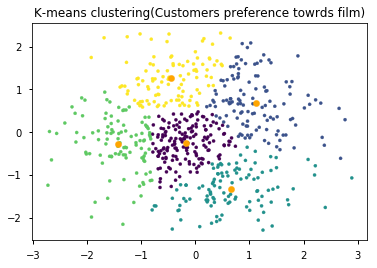

In [23]:
# YOUR CODE HERE

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(final_part)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf= principalDf[(principalDf['principal component 1']<12)]

X=np.array(principalDf)
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
plt.scatter(X[:,0], X[:,1], s = 10,  c = KMeans(n_clusters=5, random_state=0).fit_predict(X))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 40, c = 'orange', label='Centroids')
plt.title('K-means clustering(Customers preference towrds film)')
plt.show()

#### <span style="color:blue"> Your justifications & commentary here: </span>

**

#### <span style="color:blue"> Introduction </span>

In order to do the K-means clustering, we need to do the preprocessing of the data first. Our main idea is to combine the dataframe of film with customer to get each customer's favourite type of film, the average cost they spend on each film, the average length of films that they have been watching, the favourite rating of the films. And according to the question, we implement the PCA method to reduce its dimension into 2 to get the best fit of K-means clustering. 

#### <span style="color:blue"> Method </span>

In this section we mainly talk about the method that we used to process the data and generate the graph. Before we deal with the attributes, we need to transform each categorical data that we would like to use into numerical data, which in other words, labels. Hence we use label encoder to process those data. After that, in order to combine the main attributes that we would like to use, we need to combine multiple dataframes using their common attributes. And then using groupby method to get the mode for rating,category_id and the mean of length and rental_rate. However as we are using groupby, thus the attribute that we used for the groupby(customer_id) vanishes. In order to get customer_id back into the dataframe and generates a bigger dataframe which includes all the works that we did so far, we generate a new dataframe and then put them together.

Next, as the question required, we need to use PCA method to reduce its dimension. However, after we have done that. We found an outlier that makes our graph weird. Recalled that in lab7 we also have an outlier when we were using k-means clustering, in order to make the cluster more accurate and plausible, we delete this outlier as a result. Therefore I delete this outlier in this assignment as well in order to get a better result.

Finally, we make a graph of K-means clustering, and the more specific explanation would be shown in next question.

#### What do your resulting clusters represent?  Explain the distinguishing characteristics of each cluster. 
<span style= 'float: right;'><b>[2 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

**

After using the K-Means clustering algorithm, we can get the graphic which contains five different clusters. The number of clusters' points is around six hundreds because the samples we analyze are 599 customers. We divide the points into five clusters according to the attributes we choose. The cluster that locates in the center means these customers don't care about films' length, category, rating and actors. Obviously, distribution of the other four clusters  represent four different kinds of people who have four different particular favours for movies. For example, the yellow cluster on the top means poeple who prefer movies with long film length. After analyzing these clusters, we can get the favours of movies that customers interested in.

***

### Part 2 - Classification (30 Marks)

The rental company has decided that they want to use simple machine learning to allocate price tags to their movies. The tags are as follows:


|  **Classification**      |  **Requirements**        |
|--------------------------|------------------------- |
|  Cheap                   |  Rental Rate is 0.99   |
|  Moderate                |  Rental Rate is 2.99   |
|  Expensive               |  Rental Rate is 4.99  |


**Your task is to implement a `Classification Algorithm` (such as K-Nearest Neighbours) that can predict the `Price Label` of a movie**. You are required to perform the following tasks:

1. Create useable dataset/s by manually determining the 'truth values' for existing data (where the rating is within the classification system defined above)
2. Implement an algorithm that can predict the classification as per the above classifications.
3. Perform independent testing of the model and provide statistical metrics outlining the performance of your model. Splitting the dataset into testing and training subsets will assist with this.

You are welcome to use any features within the dataset, except the `Rental Rate` of the film. Various attributes relating to a movie in the tables `rating`, `movie`, `film_actor`, `actor` and `film_category` can be helpful while making the algorithm. If required, you can also look to make new **compound attributes** that may be helpful in increasing the accuracy of your model.
You are expected to justify all aspects of your answer including the features used, the metrics provided and validation system employed. Provide commentary on the strengths and potential pitfalls of the model.

<span style='color:red;'><b>Note:</b> You are only allowed to use packages that are within the Anaconda distribution. This means packages such as Keras, Tensorflow etc are not available for use.</span> 
<span style= 'float: right;'><b>[25 marks total: 18 marks model, 7 marks justification & commentary]</b></span>

In [24]:
# YOUR CODE HERE
p5 = pd.DataFrame(homework_actor.groupby('film_id').actor_id.count())
p6 = pd.DataFrame()
p6['film_id'] = homework_film.film_id.sort_values()
p6['actors'] = p5.actor_id
p6['category_id'] = homework_filmCategory.category_id
p6['length'] = homework_film.length
p6['replacement_cost'] = homework_film.replacement_cost
p6['rating'] = homework_film.rating
p6['rental_rate'] = homework_film.rental_rate
p6.fillna(0, inplace=True)
lbr = LabelEncoder()
rating = p6['rating']
lbr.fit(rating)
p6['rating'] = lbr.transform(p6['rating'])
X = p6[['actors','category_id','length','replacement_cost','rating']]
lb = LabelEncoder()
y = p6['rental_rate']
lb.fit(y)
y = lb.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y) 
clf = NearestCentroid()
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("Accuracy Score is ", accuracy_score(y_test,y_predict))

Accuracy Score is  0.36


#### <span style="color:blue"> Your justifications & commentary here: </span>

**

#### <span style="color:blue"> Introduction </span>

In order to implement the classification algorithm, we need to preprocess the data first. Our main idea is to combine all related attributes from different dataframes into one dataframe, make us convenient to use. Then we implement the K-Nearest Centroid method to do the classification hence get the accuracy score through the comparison between test datas and predict datas.

#### <span style="color:blue"> Method </span>

In this section we mainly talk about how we preprocessed the data. When we think of the rental rate of a movie, we think that rental rate relates to the actor list, movie category, movie length, movie rating, and of course the replacement cost of that movie. Hence we extract those attributes from different dataframes and use them to construct a new dataframe. However, as there are some nan values in it, like for some movie there are no actors(maybe cartoon movie or animal movie), hence we replace those nan values with zero. Then we transform the categorical datas like rating and rental rate into labels using label encoder.

Finally we implement the K-Nearest Centroid to do the classification towards the data and get the accuracy score of it.

#### Would you be able to get a better result, if you had used Clustering as a pre-processing step before Classfication? Justify your answer. 
<span style= 'float: right;'><b>[5 marks]</b></span>

#### <span style="color:blue"> Your answer here: </span>

**

Yes we can get a better result if we used clustering as a pre-processing step before classification. We can use clustering to find the natural segmentation of the data and create labels of them. Then we can use the classification given the datas and labels that generated from clustering which is more appropriate than the labels that given in the question(which is rental_rate) as the autogenerated labels would be best fit from the data provided, but the given one is not. Hence it will give us a better result with a better accuracy.

## Section D - Decision Trees (10 Marks)

The following is a small synthetic data set about the weather conditions.  We are
going to try and use decision trees to predict whether it will rain or not on the given day.


|Temperature| Cloudy| UV Index| Humidity| Rain
|---:|--:|--:|--:|--:|
|25|No| Low| Low| No 
|29|No| Low| High| No
|26|No| Low| Medium| No
|26|No| Medium| Medium| No
|27|No| Medium| High| No
|28|No| High | High| No
|25|No| High |Low| No
|29|Yes| Low |Low| Yes
|28|No| Medium| High| Yes
|28|Yes| Medium| High| Yes
|26|No| Low |Low| Yes
|27|Yes| Low |High| Yes

**Note:**
* You can treat temperature as a continuous variable and split on a range of age values.
* Attribute selection in the tree uses information gain 

#### 1. What is the initial entropy of Cloudy?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
From the table above, we get the probability for cloudy and not cloudy are 1/4, 3/4 respectively. And from the lecture slide, we know that entropy equals to the sum of probability of certain value mulitply by log2 of 1 over probability of certain value.

Hence,
$ H（cloudy) = -\frac{3}{4}log_2\frac{3}{4} - \frac{1}{4}log_2\frac{1}{4} \approx 0.811 $
</span>

#### 2. Which attribute would you choose to place at the root of a decision tree? Why?

<span style= 'float: right;'><b>[3 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
Temperature should be placed at the root of the decision tree.Because when we calculate the information gain for each attribute, we found that IG(Rain|Cloudy) = 0.407, IG(Rain|UV) = 0.146, IG(Rain|Humidity) = 0.146, IG(Rain|Temperature) = 0.353. Therefore we choose temperature as the root of the decision tree as it has greatest information gain value.

</span>

#### 3. Calculate and specify the information gain of the attribute you chose in the previous question.

<span style= 'float: right;'><b>[4 marks]</b></span>

<span style="color:blue">
    
#### YOUR ANSWER HERE
From the table above, we get the probability for rain and not rain are 7/12, 5/12 respectively. And from the lecture slide, we know that information gain of (Y|X) = H(Y)-H(Y|X).

$ IG(Rain|Cloudy) = H(Rain)-H(Rain|Cloudy) \approx 0.407 $

</span>